In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import random
from jupyterthemes import jtplot

# Jupyter NB customizations
# warnings.filterwarnings('ignore')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
plt.rc('axes', titlesize=20)                                                   # fontsize of the axes title
plt.rc('axes', labelsize=20)                                                   # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)                                                  # fontsize of the tick labels
plt.rc('ytick', labelsize=20)                                                  # fontsize of the tick labels
plt.rc('legend', fontsize=18)                                                  # legend fontsize
plt.rc('figure', titlesize=20)                                                 # fontsize of the figure title
plt.rcParams["axes.grid"] = True

# Visualizing data

In [2]:
loc = r"\Users\raul_\OneDrive\Escritorio\Side__Projects\Cosmology_Learning\Cosmic_Web\Development\halos_0.0.ascii"

# Reading the data
start1 = time.time()

df = pd.read_csv(loc, delimiter=" ", usecols=["x", "y", "z", "m200b", "PosUncertainty"])[18:]
x, y, z, pos_sigma, m200b = df.values.astype(np.float).T 
log_m = np.log10(m200b)

end1 = time.time()
print(f"Exracting the data took {end1-start1:.2f} seconds.")

# Doing a 3-D scatter plot of the positiions as well as plotting the histogram of mass distribution
n_halos = len(x)

Exracting the data took 0.63 seconds.


C:\Users\raul_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Applying MST to subsample

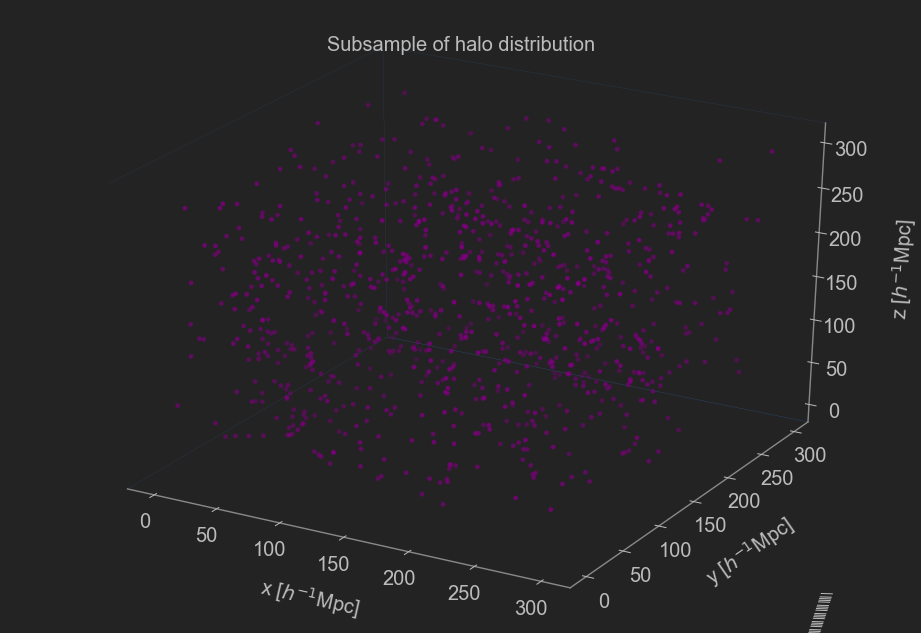

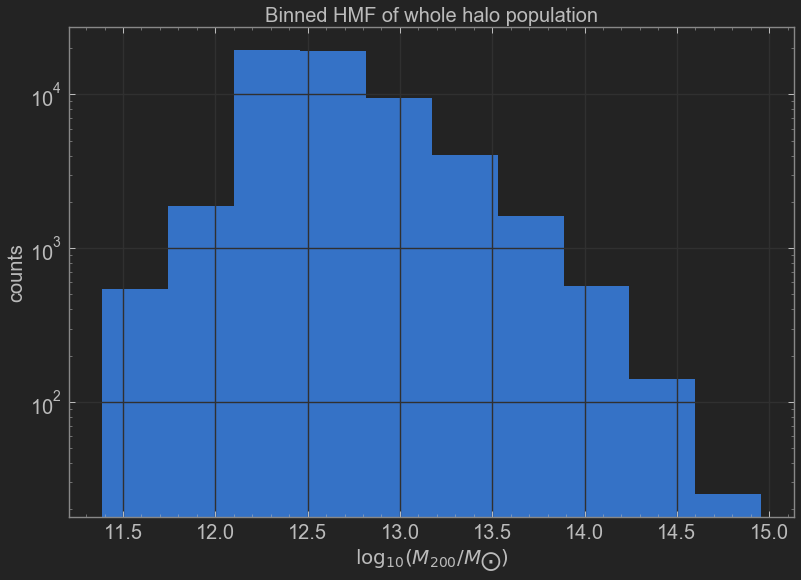

Plotting the particles' position and the binned HMF took 6.64 seconds.


In [3]:
# Subsampling the data 
n_subsamp = 900

samples = np.arange(n_halos)
idx_subsamp = np.random.choice(samples, n_subsamp)
idx_subsamp = np.sort(idx_subsamp)

x_s, y_s, z_s, log_m_s, pos_sigma_s = x[idx_subsamp], y[idx_subsamp], z[idx_subsamp], log_m[idx_subsamp], pos_sigma[idx_subsamp] 

start2 = time.time()

fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_s, y_s, z_s, color="purple")
ax.set_xlabel("x [$h^{-1}$Mpc]", labelpad=30)
ax.set_ylabel("y [$h^{-1}$Mpc]", labelpad=30)
ax.set_zlabel("z [$h^{-1}$Mpc]", labelpad=30)
ax.set_title("Subsample of halo distribution")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('b')
ax.yaxis.pane.set_edgecolor('b')
ax.zaxis.pane.set_edgecolor('b')
# ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
if True:
    plt.savefig('Halo__Subsample__Distribution.png', format='png', dpi=200, pad_inches=0.1, bbox_inches='tight')
plt.show()

plt.figure(figsize=(13,9))
plt.hist(log_m)
plt.xlabel(r"$\log_{10}(M_{200}/M_{\bigodot})$")
plt.yscale("log")
plt.ylabel("counts")
plt.title("Binned HMF of whole halo population")
if True:
    plt.savefig('Halo__Binned_HMF.png', format='png', dpi=200, pad_inches=0.1, bbox_inches='tight')
plt.show()

end2 = time.time()
print(f"Plotting the particles' position and the binned HMF took {end2-start2:.2f} seconds.")

Producing the KNN graph and building the MST took 0.02 seconds.
Extracting the edge information took 0.00 seconds.
900
No
Plotting the MST took 7.07 seconds.


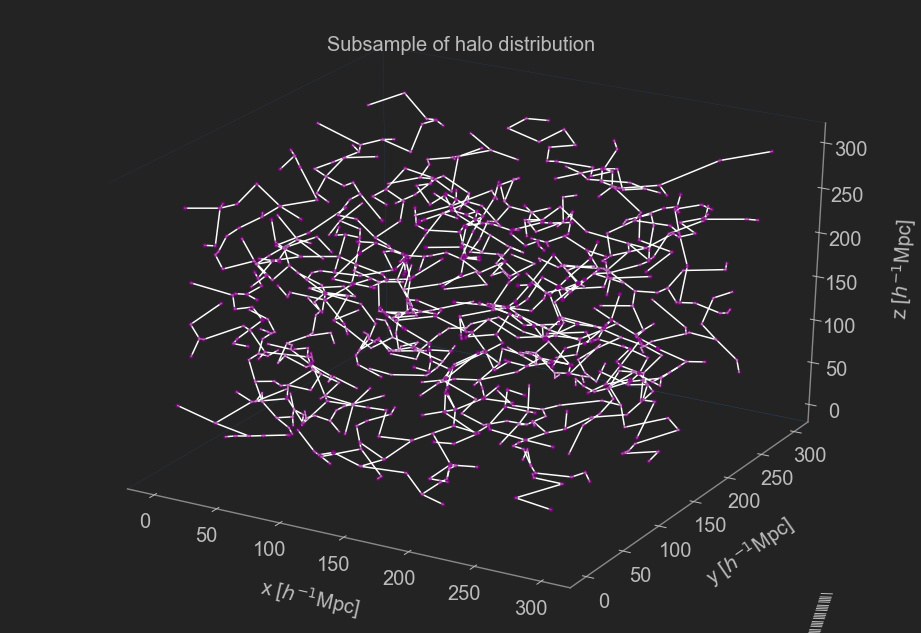

'\n    TO DO:\n    -----\n        (0) Sent plot and questions to do statistical comparison to Rien & Georg.\n        (1) Build class for MST with above functions as methods, where init will mainly be point distribution.\n        (2) Started statistical analysis for edges.\n        (3) Played around with gudhi.\n\n'

In [5]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree

def Build_MST(x,y,z,
             k=20):
    """
    Builds the Minimum Spanning Tree from a 3D point distribution.
    First, it constructs the K-Nearest-Neighbor graph, then it builds
    the MST from the graph outputting the Weighted Adjacency Matrix of
    the graph associated to the point distribution.
    
    Parameters:
    ----------
    x: array-like
       x-coordinates of point distribution.
    y: array-like
       y-coordinates of point distribution.
    z: array-like
       z-coordinates of point distribution.
    k: int
       Number of neighbors to consider when building graph.
       Default is k=20 as this gives best accuracy (complete
       graph) to computatonial time ratio (see Nadoo et al. 2020).
       
    Returns:
    -------
    mst: <class 'scipy.sparse.csr.csr_matrix'>
         The N x N compressed-sparse representation of the 
         undirected minimum spanning tree over the input.
    """
    start3 = time.time()
    
    # Bring coordinates into right format
    coords = np.array([x,y,z]).T
    # Build MST
    k_nearest_neighbour_graph = kneighbors_graph(coords, 20, mode="distance")
    mst = minimum_spanning_tree(k_nearest_neighbour_graph, overwrite=True)
    
    end3 = time.time()
    print(f"Producing the KNN graph and building the MST took {end3-start3:.2f} seconds.")
    return mst

def extract_edges(x, y , z, 
                 plot=True, savefig=False):
    """
    This function extracts the edges from a MST: the (x,y,z) coordinates of
    both ends of each edge, the lengths of edges and the index wrt to the nodes.
    
    Parameters:
    ----------
    mst: <class 'scipy.sparse.csr.csr_matrix'>
         The N x N compressed-sparse representation of the 
         undirected minimum spanning tree over the input.
    plot: (Optional) Boolean
          If True, plots the point distribution with its MST.
          Default is False to save computation time.
    savefig: (Optional) Boolean
             Save the plot of the MST. Se to False by default.
             
    Returns:
    -------
    Document later
    
    """
    
    # Call Build_MST method to get MST adjacency matrix
    mst = Build_MST(x, y , z)
    mst = mst.tocoo()
    start4 = time.time()
    # Find the indexes of the ends of each edges wrt to nodes
    idx_end_a, idx_end_b = mst.row, mst.col
    # Find the respectieve coordinates
    x_a, x_b = x[idx_end_a], x[idx_end_b]
    y_a, y_b = y[idx_end_a], y[idx_end_b] 
    z_a, z_b = z[idx_end_a], z[idx_end_b] 
    # Storing edge information for return
    edge_x = np.array([x_a, x_b])
    edge_y = np.array([y_a, y_b])
    edge_z = np.array([z_a, z_b])
    edge_lengths = mst.data
    edge_idxs = np.array([idx_end_a, idx_end_b])
    
    end4 = time.time()
    print(f"Extracting the edge information took {end4-start4:.2f} seconds.")
    
    print(len(x_s))
    # (Optional) Plot MST including point distribution
    if plot is True:
        start5 = time.time()
        n_edges = edge_idxs.shape[-1]
        
        fig = plt.figure(figsize=(13,9))
        ax = fig.add_subplot(111, projection='3d')
        
        # Making sure we only plot less than 600 edges to avoid
        # kernel death.
        if n_edges <= 1500:
            print("No")
            for i in range(n_edges):
                e_x = np.array([x_a[i], x_b[i]])
                e_y = np.array([y_a[i], y_b[i]])
                e_z = np.array([z_a[i], z_b[i]])
                ax.plot(e_x, e_y, e_z, color="white")
            ax.scatter(x, y, z, color="purple")
            
        else:
            print("Yes")
            for i in range(600):
                e_x = np.array([x[idx_end_a[i]], x[idx_end_b[i]]])
                e_y = np.array([y[idx_end_a[i]], y[idx_end_b[i]]])
                e_z = np.array([z[idx_end_a[i]], z[idx_end_b[i]]])
                ax.plot(e_x, e_y, e_z, color="mediumorchid")
            ax.scatter(x[:600], y[:600], z[:600], color="purple")
        
        # Setting aesthetic customs
        ax.set_xlabel("x [$h^{-1}$Mpc]", labelpad=30)
        ax.set_ylabel("y [$h^{-1}$Mpc]", labelpad=30)
        ax.set_zlabel("z [$h^{-1}$Mpc]", labelpad=30)
        ax.set_title("Subsample of halo distribution")
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        # Now set color to black (or whatever is "invisible")
        ax.xaxis.pane.set_edgecolor('b')
        ax.yaxis.pane.set_edgecolor('b')
        ax.zaxis.pane.set_edgecolor('b')
        # ax.set_axis_off()
        ax.grid(False)
        plt.tight_layout()
        if savefig is True:
                plt.savefig('Halo__Subsample__MST.png', format='png', dpi=200, pad_inches=0.1, bbox_inches='tight')
        end5 = time.time()
        
        print(f"Plotting the MST took {end5-start5:.2f} seconds.")
        plt.show()
    
    return edge_lengths, edge_x, edge_y, edge_z, edge_idxs


# Now producing a MST from this subsample
# def MST()

coords = np.array([x_s, y_s, z_s]).T
edge_lengths, edge_x, edge_y, edge_z, edge_index = extract_edges(x_s, y_s, z_s, plot=True, savefig=True)

"""
    TO DO:
    -----
        (0) Sent plot and questions to do statistical comparison to Rien & Georg.
        (1) Build class for MST with above functions as methods, where init will mainly be point distribution.
        (2) Started statistical analysis for edges.
        (3) Played around with gudhi.

"""

